In [1]:
import numpy as np
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('exams.csv')

In [3]:
# check for missing values

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# total score = average of the 3 existing scores.
# It will be used to determine whether a student deserves to pass the whole test, not only an individual section of the test.

data['total score'] = (data['math score']+data['reading score']+data['writing score'])/3
data['total score'] = data['total score'].astype(int)
data.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
472,male,group D,bachelor's degree,standard,none,78,73,81,77


In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group D,high school,free/reduced,none,55,61,62,59
1,male,group D,some high school,standard,none,60,56,54,56
2,male,group C,some high school,standard,none,84,77,70,77
3,female,group C,associate's degree,free/reduced,none,49,62,59,56
4,female,group E,associate's degree,standard,none,100,100,100,100


In [7]:
# Overall look at dataset
data.describe()

,math score,reading score,writing score,total score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.108000,70.065000,68.882000,68.356000
std,15.057459,14.578179,15.237856,14.229397
min,19.000000,27.000000,26.000000,25.000000
25%,57.000000,60.000000,58.000000,58.000000
50%,67.000000,70.000000,69.000000,68.500000
75%,78.000000,81.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000,100.000000


In [8]:
# Race/ethnicity, parental level of education of top 10 students have? Are they mostly male, or female?

sorted_data = data.sort_values(by= ['total score'],ascending = False)
sorted_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
126,female,group E,bachelor's degree,standard,none,100,100,100,100
606,female,group D,master's degree,standard,completed,100,100,100,100
550,female,group E,bachelor's degree,standard,none,100,100,100,100
4,female,group E,associate's degree,standard,none,100,100,100,100
344,male,group C,bachelor's degree,standard,completed,100,100,100,100
105,male,group C,bachelor's degree,standard,completed,100,97,98,98
210,female,group D,some college,standard,completed,97,99,100,98
149,female,group D,some high school,standard,completed,93,99,99,97
959,female,group E,some college,standard,none,95,99,99,97
198,female,group A,master's degree,standard,completed,91,100,100,97


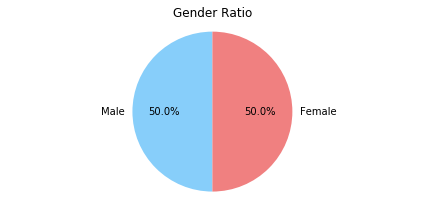

In [9]:
# let us explore the data set, starting with ratio of male and female students:

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
ax.set_title("Gender Ratio")

male = data[data.gender == 'male'].shape[0]
female = data[data.gender == 'female'].shape[0]

labels = 'Male', 'Female'
sizes= [male, female]
colors = ['lightskyblue', 'lightcoral']

plt.axis("equal")
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

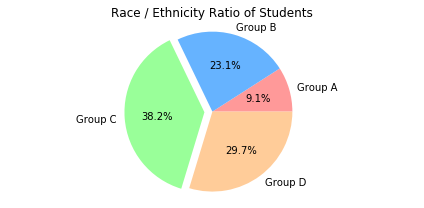

In [10]:
# ratio of each race/ethnicity group

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
ax.set_title("Race / Ethnicity Ratio of Students")

GA = data[data['race/ethnicity'] == 'group A'].shape[0]
GB = data[data['race/ethnicity'] == 'group B'].shape[0]
GC = data[data['race/ethnicity'] == 'group C'].shape[0]
GD = data[data['race/ethnicity'] == 'group D'].shape[0]

labels = 'Group A', 'Group B', 'Group C', 'Group D'
sizes = [GA, GB, GC, GD]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0, 0, 0.1, 0)

plt.axis("equal")
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

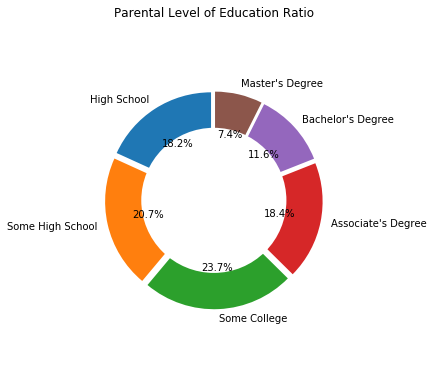

In [11]:
# ratio of students based on parental level of education 

fig, ax = plt.subplots(figsize=(6, 5.5), subplot_kw=dict(aspect="equal"))
ax.set_title("Parental Level of Education Ratio")

hs = data[data['parental level of education'] == 'high school'].shape[0]
shs = data[data['parental level of education'] == 'some high school'].shape[0]
sc = data[data['parental level of education'] == 'some college'].shape[0]
ad = data[data['parental level of education'] == 'associate\'s degree'].shape[0]
bd = data[data['parental level of education'] == 'bachelor\'s degree'].shape[0]
md = data[data['parental level of education'] == 'master\'s degree'].shape[0]

labels = 'High School', 'Some High School', 'Some College', 'Associate\'s Degree', 'Bachelor\'s Degree', 'Master\'s Degree'
sizes = [hs, shs, sc, ad, bd, md]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.tight_layout()
plt.show()

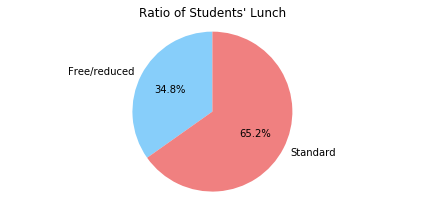

In [12]:
# ratio of students having free/reduced lunch and standard lunch

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
ax.set_title("Ratio of Students' Lunch")

free_reduced = data[data['lunch'] == 'free/reduced'].shape[0]
std = data[data['lunch'] == 'standard'].shape[0]

labels = 'Free/reduced', 'Standard'
sizes= [free_reduced, std]
colors = ['lightskyblue', 'lightcoral']

plt.axis("equal")
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

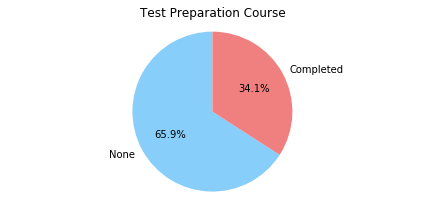

In [13]:
# ratio of students who took the test prep course and who didn't

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
ax.set_title("Test Preparation Course")

none = data[data['test preparation course'] == 'none'].shape[0]
completed = data[data['test preparation course'] == 'completed'].shape[0]

labels = 'None', 'Completed'
sizes= [none, completed]
colors = ['lightskyblue', 'lightcoral']

plt.axis("equal")
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Total Score')

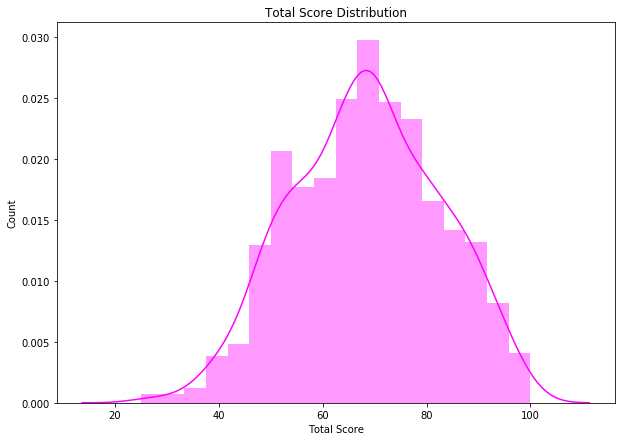

In [14]:
import seaborn as sns
from math import * 
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,7))
plt.title('Total Score Distribution')
plt.ylabel('Count')
sns.distplot(data['total score'], color = 'fuchsia')
plt.xlabel('Total Score')

In [15]:
# exploring the data set, and also to see if each column affects 
# the target variables to a noticeable degree, comparing the scores to the mean. 

data.groupby(['gender']).mean()

,math score,reading score,writing score,total score
gender,,,,
female,64.782,73.794,73.530,70.378
male,69.434,66.336,64.234,66.334


In [16]:
# visualization - total score by gender


In [17]:
data.groupby(['race/ethnicity']).mean()

,math score,reading score,writing score,total score
race/ethnicity,,,,
group A,66.506494,70.194805,68.480519,68.090909
group B,62.964286,66.331633,64.693878,64.352041
group C,64.583333,69.077160,67.250000,66.638889
group D,68.289683,71.265873,71.857143,70.134921
group E,76.238411,74.960265,73.059603,74.403974


Text(0.5, 1.0, 'Total Score With Respect to Race/Ethnicity')

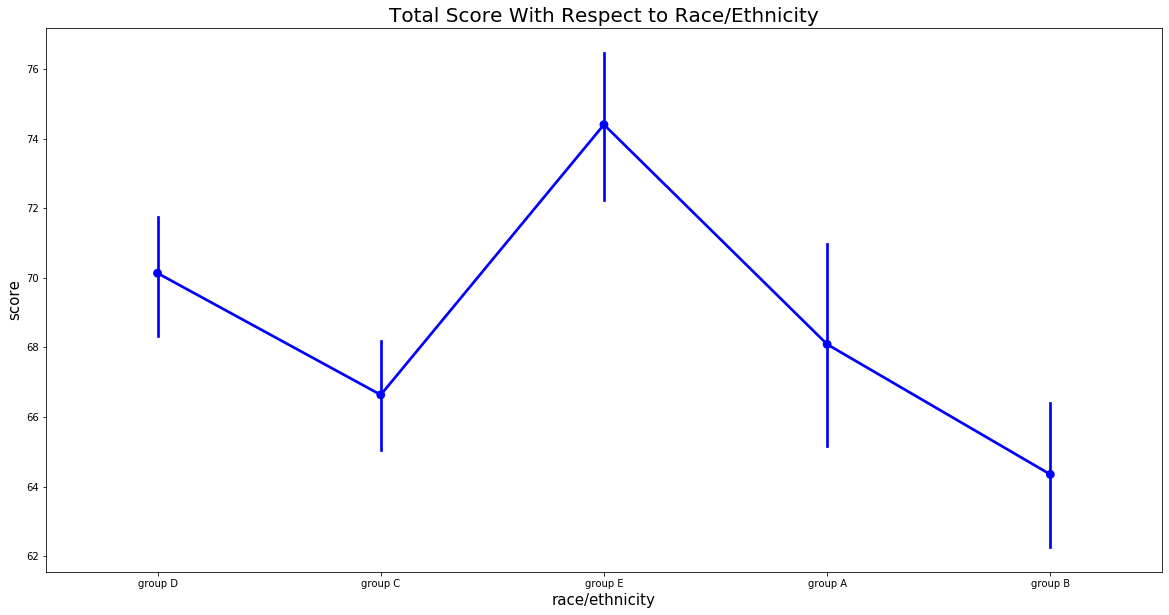

In [18]:
# visualization - total score by race/ethnicity

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='race/ethnicity',y='total score',data=data,color='blue')

plt.xlabel('race/ethnicity',fontsize = 15,color='black')
plt.ylabel('score',fontsize = 15,color='black')
plt.title('Total Score With Respect to Race/Ethnicity',fontsize = 20,color='black')

In [19]:
data.groupby(['parental level of education']).mean()

,math score,reading score,writing score,total score
parental level of education,,,,
associate's degree,68.103261,72.217391,71.059783,70.130435
bachelor's degree,71.327586,74.465517,75.034483,73.275862
high school,64.939560,67.428571,65.549451,65.637363
master's degree,72.648649,77.283784,76.864865,75.297297
some college,67.109705,69.544304,68.641350,68.105485
some high school,63.782609,66.019324,63.850242,64.217391


Text(0.5, 1.0, 'Total Score With Respect to Parental Level of Education')

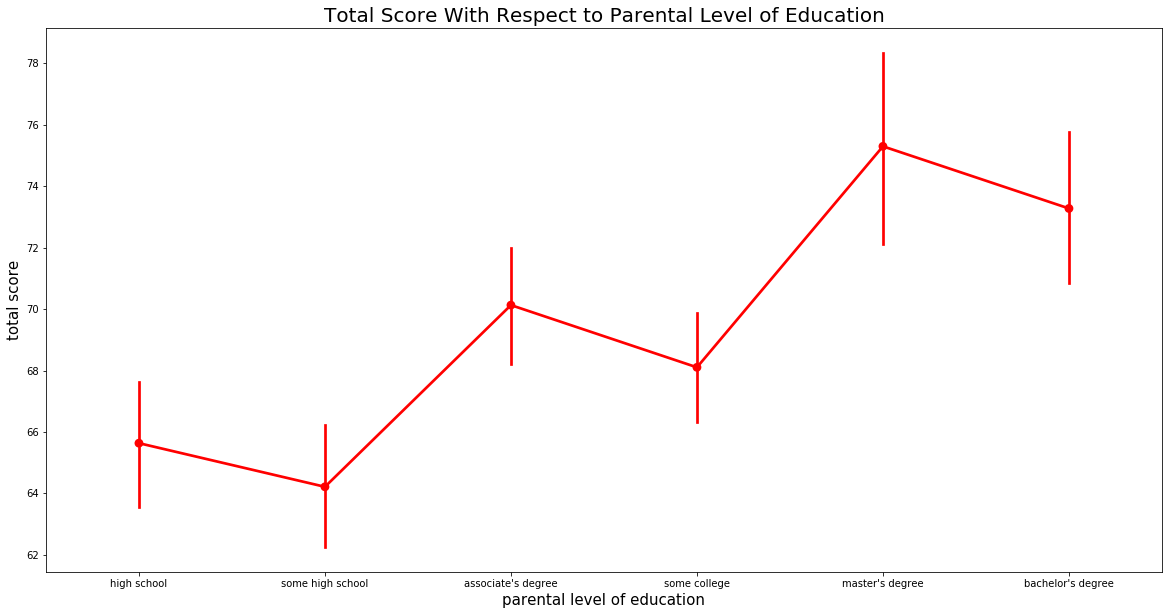

In [20]:
# visualization - total score by parental level of education


f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='parental level of education',y='total score',data=data,color='red')

plt.xlabel('parental level of education',fontsize = 15,color='black')
plt.ylabel('total score',fontsize = 15,color='black')
plt.title('Total Score With Respect to Parental Level of Education',fontsize = 20,color='black')

In [21]:
data.groupby(['lunch']).mean()

,math score,reading score,writing score,total score
lunch,,,,
free/reduced,58.804598,64.195402,62.028736,61.344828
standard,71.539877,73.197853,72.539877,72.098160


In [22]:
# visualization - total score by lunch

In [23]:
data.groupby(['test preparation course']).mean()

,math score,reading score,writing score,total score
test preparation course,,,,
completed,70.621701,74.551320,75.454545,73.190616
none,65.289833,67.743551,65.481032,65.854325


In [24]:
# visualization - total score by prep course


In [25]:
# calculating mutual information for target variables 

def calc_MI(X,Y,bins):

   c_XY = np.histogram2d(X[:,0],Y,bins)[0]
   c_X = np.histogram(X,bins)[0]
   c_Y = np.histogram(Y,bins)[0]

   H_X = shan_entropy(c_X)
   H_Y = shan_entropy(c_Y)
   H_XY = shan_entropy(c_XY)

   MI = H_X + H_Y - H_XY
   return MI

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

bins = 10

In [26]:
# x = gender, y = math score

x = data['gender']
y = data['math score']

le = preprocessing.LabelEncoder()
le.fit(x)

x_1 = le.fit_transform(x) 
x_1 = x_1.reshape(-1, 1)

A = np.array(x_1)
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)
        
matMI = calc_MI(x_1, y, bins)
matMI


0.0288763725751493

In [27]:
# x = gender, y = reading score

y = data['reading score']

matMI = calc_MI(x_1, y, bins)
matMI

0.058822530443375154

In [28]:
# x = gender, y = writing score

y = data['writing score']
matMI = calc_MI(x_1, y, bins)
matMI

0.08240336046011043

In [29]:
# x = race/ethnicity, y = math score

x = data['race/ethnicity']
y = data['math score']

le = preprocessing.LabelEncoder()
le.fit(x)

x_2 = le.fit_transform(x) 
x_2 = x_2.reshape(-1, 1)

# since x changed, update A and the relevant variables

A = np.array(x_2)
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)

matMI = calc_MI(x_2, y, bins)
matMI

0.08370058914989809

In [30]:
# x = race/ethnicity, y = reading score

y = data['reading score']
matMI = calc_MI(x_2, y, bins)
matMI

0.04641904437207511

In [31]:
# x = race/ethnicity, y = writing score

y = data['writing score']
matMI = calc_MI(x_2, y, bins)
matMI

0.05863806767121815

In [32]:
# x = parental level of education, y = math score

x = data['parental level of education']
y = data['math score']

le = preprocessing.LabelEncoder()
le.fit(x)

x_3 = le.fit_transform(x) 
x_3 = x_3.reshape(-1, 1)

# since x changed, update A and the relevant variables

A = np.array(x_3)
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)
        
matMI = calc_MI(x_3, y, bins)
matMI

0.04854356733786869

In [33]:
# x = parental level of education, y = reading score

y = data['reading score']
matMI = calc_MI(x_3, y, bins)
matMI

0.060942298108336956

In [34]:
# x = parental level of education, y = writing score

y = data['writing score']
matMI = calc_MI(x_3, y, bins)
matMI

0.08030174412931412

In [35]:
# x = lunch, y = math score

x = data['lunch']
y = data['math score']

le = preprocessing.LabelEncoder()
le.fit(x)

x_4 = le.fit_transform(x) 
x_4 = x_4.reshape(-1, 1)

# since x changed, update A and the relevant variables

A = np.array(x_4)
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)

matMI = calc_MI(x_4, y, bins)
matMI

0.12909788096779318

In [36]:
# x = lunch, y = reading score

y = data['reading score']
matMI = calc_MI(x_4, y, bins)
matMI

0.07145065289743258

In [37]:
# x = lunch, y = writing score

y = data['writing score']
matMI = calc_MI(x_4, y, bins)
matMI

0.08216904086589238

In [38]:
# x = test preparation course, y = math score

x = data['test preparation course']
y = data['math score']

le = preprocessing.LabelEncoder()
le.fit(x)

x_5 = le.fit_transform(x) 
x_5 = x_5.reshape(-1, 1)

# since x changed, update A and the relevant variables

A = np.array(x_5)
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(ix+1,n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)

matMI = calc_MI(x_5, y, bins)
matMI

0.026565821358135455

In [39]:
# x = test preparation course, y = reading score

y = data['reading score']
matMI = calc_MI(x_5, y, bins)
matMI

0.04797702334524123

In [40]:
# x = test preparation course, y = writing score

y = data['writing score']
matMI = calc_MI(x_5, y, bins)
matMI

0.08331076156483963

In [41]:
# preparing data for training. categorical attributes must be labelled for a model to train on them.

data['gender'] = le.fit_transform(data['gender'])
data['race/ethnicity'] = le.fit_transform(data['race/ethnicity'])
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['lunch'] = le.fit_transform(data['lunch'])
data['test preparation course'] = le.fit_transform(data['test preparation course'])

In [42]:
# I will assign a grade to each student and predict the grade based on the categorical features

conditions = [
    
    # best grade
    (data['total score'] >= 91) & (data['total score'] <= 100) & (data['math score'] >= 50)
    & (data['reading score'] >= 50) & (data['writing score'] >= 50),
    
    (data['total score'] >= 71) & (data['total score'] <= 90) & (data['math score'] >= 50)
    & (data['reading score'] >= 50) & (data['writing score'] >= 50),    
    
    (data['total score'] >= 50) & (data['total score'] <= 70) & (data['math score'] >= 50) 
    & (data['reading score'] >= 50) & (data['writing score'] >= 50),
    
    # fail
    (data['total score'] < 50) | (data['math score'] < 50) | (data['reading score'] < 50) | (data['writing score'] < 50)
]
         
choices = [1, 2, 3, 4]

data['grade'] = np.select(conditions, choices, default=4)

# Clearly, our data set is imbalanced
data['grade'].value_counts()

3    381
2    373
4    185
1     61
Name: grade, dtype: int64

In [43]:
# divide data into attributes and target variable
x = data.iloc[:,:5]

# target variable: grade
y = data.iloc[:,9]

# split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [44]:
# due to the imbalance of the data, oversampling

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 0)

#sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
#x_res, y_res = sm.fit_resample(x, y)

columns = x_train.columns

# it's important that we perform oversampling on training data only
os_data_x, os_data_y = os.fit_sample(x_train, y_train) 
os_data_x = pd.DataFrame(data=os_data_x, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])

print("length of oversampled data: ", len(os_data_x))
print("Grade 4: ", len(os_data_y[os_data_y['y']==4]))
print("Grade 3: ", len(os_data_y[os_data_y['y']==3]))
print("Grade 2: ", len(os_data_y[os_data_y['y']==2]))
print("Grade 1: ", len(os_data_y[os_data_y['y']==1]))

print("Grade 4 / all: ", len(os_data_y[os_data_y['y']==4])/len(os_data_x))
print("Grade 3 / all: ", len(os_data_y[os_data_y['y']==3])/len(os_data_x))
print("Grade 2 / all: ", len(os_data_y[os_data_y['y']==2])/len(os_data_x))
print("Grade 1 / all: ", len(os_data_y[os_data_y['y']==1])/len(os_data_x))

length of oversampled data:  1216
Grade 4:  304
Grade 3:  304
Grade 2:  304
Grade 1:  304
Grade 4 / all:  0.25
Grade 3 / all:  0.25
Grade 2 / all:  0.25
Grade 1 / all:  0.25


In [45]:
# classifier evaluation methods

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [46]:
# function to add labels to confusion matrix for clarity

def CM(true, pred):
    
    cm = pd.DataFrame(
        confusion_matrix(true, pred, labels=[1, 2, 3, 4]), 
        index=['true: 1', 'true: 2', 'true: 3', 'true: 4'], 
        columns=['pred: 1', 'pred: 2', 'pred: 3', 'pred: 4'])

    return cm


In [47]:
# function to calculate average distance from cm

def average_distance(cm):
    
    sum = 0
    
    for i in range(0, 4):
        for j in range(0, 4):
            if(i != j):
                
                sum += abs(cm.iloc[i, j] * (j - i))
    
    cm_total = cm.to_numpy().sum()
    diagonal = (cm.to_numpy().diagonal()).sum()
    
    average = sum / (cm_total - diagonal)
    
    return average

In [48]:
# custom loss function

def custom_loss(true, pred):
    
    square = (true - pred)^2
    loss = sum(square)
    
    return loss

In [49]:
# 1. Logistic regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(os_data_x, os_data_y)
#log_reg.fit(x_train, y_train)

y_pred1 = log_reg.predict(x_test)

print("Training Accuracy :", log_reg.score(os_data_x, os_data_y))
#print("Training Accuracy :", log_reg.score(x_train, y_train))
print("Testing Accuracy :", log_reg.score(x_test, y_test))

Training Accuracy : 0.49588815789473684
Testing Accuracy : 0.31


In [50]:
# evaluating our logistic regression model - confusion matrix

cm1 = CM(y_test, y_pred1)
cm1

,pred: 1,pred: 2,pred: 3,pred: 4
true: 1,7,2,0,1
true: 2,27,17,24,11
true: 3,15,16,18,28
true: 4,3,3,8,20


In [51]:
# calculating average distance based on cm

average_distance(cm1)

1.2681159420289856

In [52]:
custom_loss(y_test, y_pred1)

73

In [53]:
# evaluating our logistic regression model - cross validation

log_accuracy = cross_val_score(estimator = log_reg, X = x_train, y = y_train, cv = 10)
print(log_accuracy.mean())
print(log_accuracy.std())

0.48346541345880467
0.04729870873283233


In [54]:
# 2. Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train.values.ravel())

y_pred2 = random_forest.predict(x_test)

print("Training Accuracy :", random_forest.score(x_train, y_train))
print("Testing Accuracy :", random_forest.score(x_test, y_test))

Training Accuracy : 0.615
Testing Accuracy : 0.435


In [55]:
# evaluating our random forest model - confusion matrix

cm2 = CM(y_test, y_pred2)
cm2

,pred: 1,pred: 2,pred: 3,pred: 4
true: 1,0,7,2,1
true: 2,4,40,30,5
true: 3,0,27,38,12
true: 4,0,9,16,9


In [56]:
average_distance(cm2)

1.1592920353982301

In [57]:
custom_loss(y_test, y_pred2)

139

In [58]:
# evaluating our random forest model - cross validation

rf_accuracy = cross_val_score(estimator = random_forest, X = x_train, y = y_train, cv = 10)
print(rf_accuracy.mean())
print(rf_accuracy.std())

0.42079786563036015
0.06501216705606844


In [59]:
# 3. Support Vector Machine

from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')  
SVM.fit(x_train, y_train)
y_pred3 = SVM.predict(x_test)

print("Training Accuracy :", SVM.score(x_train, y_train))
print("Testing Accuracy :", SVM.score(x_test, y_test))

Training Accuracy : 0.48625
Testing Accuracy : 0.43


In [60]:
# evaluating our SVM model - confusion matrix 

cm3 = CM(y_test, y_pred3)
cm3

,pred: 1,pred: 2,pred: 3,pred: 4
true: 1,0,10,0,0
true: 2,0,45,26,8
true: 3,0,32,25,20
true: 4,0,6,12,16


In [61]:
average_distance(cm3)

1.1228070175438596

In [62]:
custom_loss(y_test, y_pred3)

104

In [63]:
# evaluating our SVM model - cross validation

SVM_accuracy = cross_val_score(estimator = SVM, X = x_train, y = y_train, cv = 10)
print(SVM_accuracy.mean())
print(SVM_accuracy.std())

0.4466038556476257
0.04794850102536737


In [87]:
# 4. Linear Regression

# divide data into attributes and target variable
x = data.iloc[:,:5]

# target variable: total score, not grade this time
y = data.iloc[:,8]

x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [115]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x2_train, y2_train)

y_pred4 = lm.predict(x2_test)

coeff_df = pd.DataFrame(lm.coef_, x_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
gender,-3.432345
race/ethnicity,1.787047
parental level of education,-1.094338
lunch,11.203695
test preparation course,-7.671437


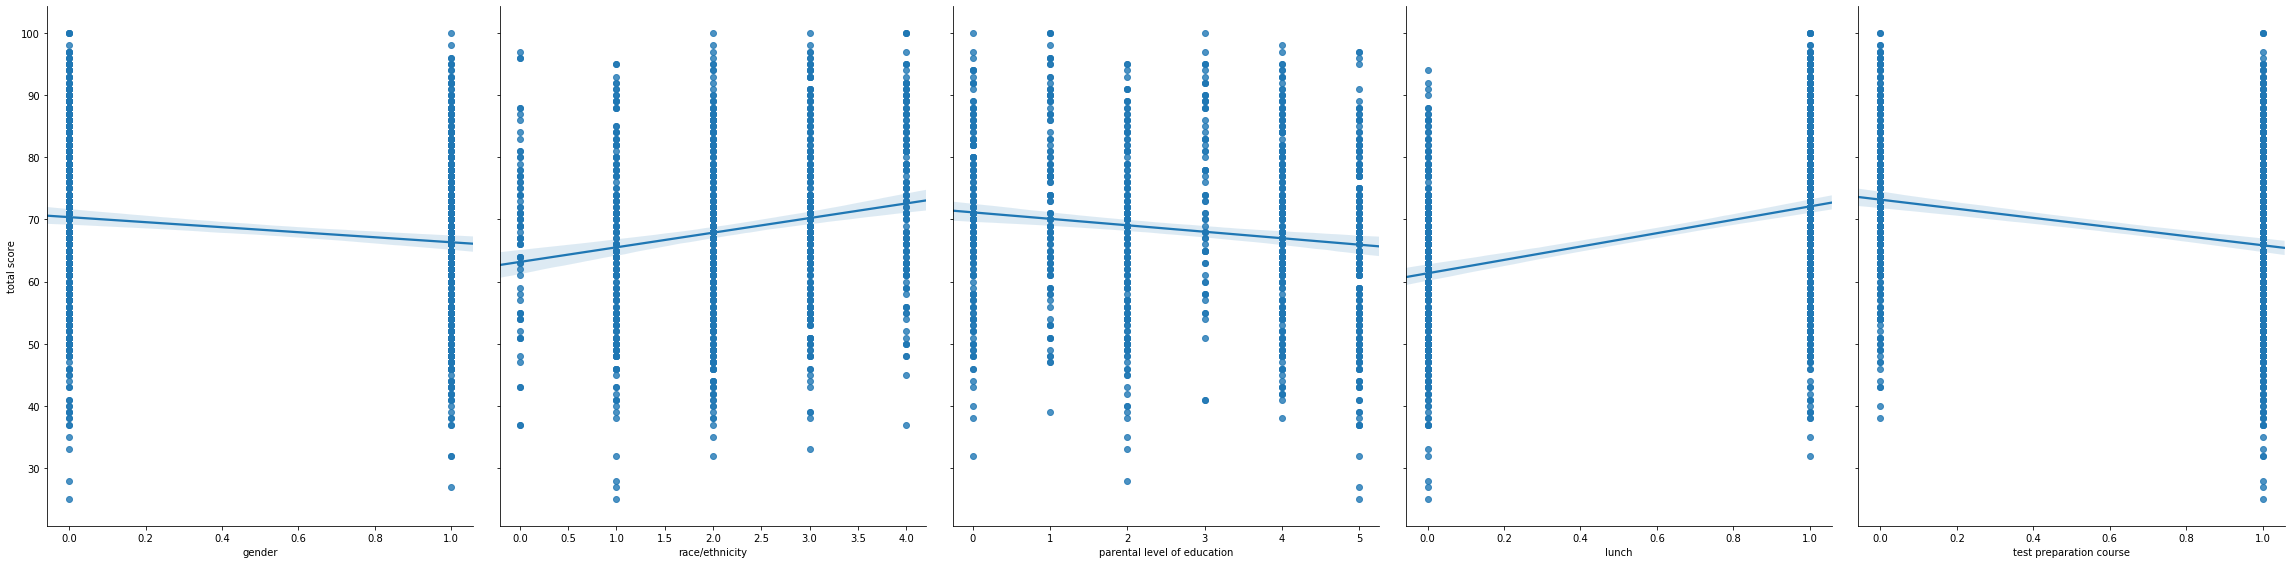

In [66]:
# visualize linear regression ..? 

sns.pairplot(data, x_vars=["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"],
             y_vars="total score", size=8, aspect=0.8, kind='reg')

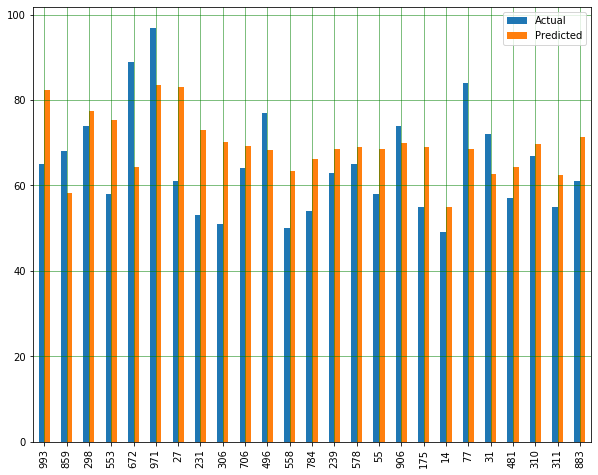

In [67]:
# (old) plot the actual and predicted values

df = pd.DataFrame({'Actual': y2_test, 'Predicted': y_pred4})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [68]:
# evaluating linear regression - MSE and MAE (target variable = total score)

difference = y_pred4 - y2_test.to_numpy()
difference = difference**2

print("Mean Squared Error: ", sum(difference)/len(difference))

absolute = abs(y_pred4 - y2_test)

print("Mean Absolute Error: ", sum(absolute)/len(absolute))

Mean Squared Error:  149.90674404822238
Mean Absolute Error:  10.24317452562737


In [69]:
# Calculate MSE and MAE for the grade prediction of the other methods.

def MSE(true, pred):
    
    difference = (true - pred)**2
    
    mse = sum(difference)/len(difference)

    return mse

In [70]:
def MAE(true, pred):
    
    absolute = abs(true - pred)
    
    mae = sum(absolute)/len(absolute)
    
    return mae

In [71]:
# logistic regression - MSE, MAE

mse1 = MSE(y_test, y_pred1)
mae1 = MAE(y_test, y_pred1)

print("Mean Squared Error for logistic regression: ", mse1)
print("Mean Absolute Error for logistic regression: ", mae1)

Mean Squared Error for logistic regression:  1.285
Mean Absolute Error for logistic regression:  0.875


In [72]:
# random forest - MSE, MAE

mse2 = MSE(y_test, y_pred2)
mae2 = MAE(y_test, y_pred2)

print("Mean Squared Error for random forest: ", mse2)
print("Mean Absolute Error for random forest: ", mae2)

Mean Squared Error for random forest:  0.845
Mean Absolute Error for random forest:  0.655


In [73]:
# SVM - MSE, MAE

mse3 = MSE(y_test, y_pred3)
mae3 = MAE(y_test, y_pred3)

print("Mean Squared Error for SVM: ", mse3)
print("Mean Absolute Error for SVM: ", mae3)

Mean Squared Error for SVM:  0.78
Mean Absolute Error for SVM:  0.64


In [117]:
# evaluating linear regression - MSE and MAE (with total score converted to grade) to compare the models

y_pred4 = pd.Series(y_pred4)

y_pred4[y_pred4 >= 90] = 1
y_pred4[(y_pred4 >= 70) & (y_pred4 < 90)] = 2
y_pred4[(y_pred4 >= 50) & (y_pred4 < 70)] = 3

y_pred4 = y_pred4.astype('int32')

print(y_pred4.value_counts())

y_pred4 = y_pred4.to_numpy()

mse4 = MSE(y_test, y_pred4)
mae4 = MAE(y_test, y_pred4)

print("Mean Squared Error for linear regression: ", mse4)
print("Mean Absolute Error for linear regression: ", mae4)

3    111
2     89
dtype: int64
Mean Squared Error for linear regression:  0.67
Mean Absolute Error for linear regression:  0.6
